In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir

In [4]:
print(listdir('../data/'))

['Admission_Predict.csv', 'AirPassengers.csv', 'BlackFriday.csv', 'CCCHURN-Bank Churn.doc', 'CCCHURN.csv', 'cs-training.csv', 'data1.csv', 'data2.csv', 'LoR-Bank-full-TDsubscription.xlsx', 'Melbourne_housing_FULL.csv', 'train04.csv']


In [212]:
df = pd.read_csv('../data/BlackFriday.csv')
df.drop('User_ID',axis=1,inplace=True)

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Watching the dependant variable (Purchase)

Treating outliers on dependant variable is quite different than other values.

In [16]:
df['Purchase'].describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

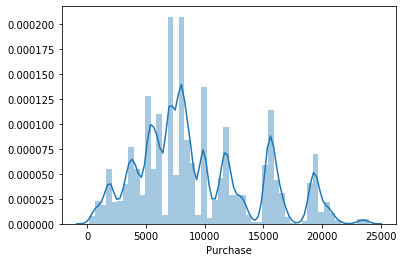

In [14]:
sns.distplot(df['Purchase'])

 On black friday, many buyers might be buying *discounted* products in large numbers.

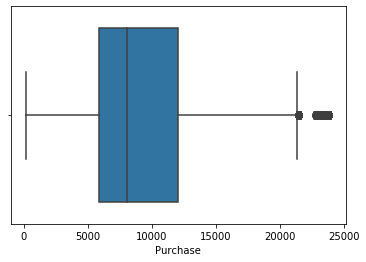

In [18]:
ax = sns.boxplot(df['Purchase'])

#### Age

In [20]:
df['Age'].value_counts(normalize=True)

26-35    0.399366
36-45    0.199969
18-25    0.181619
46-50    0.082827
51-55    0.069977
55+      0.038884
0-17     0.027358
Name: Age, dtype: float64

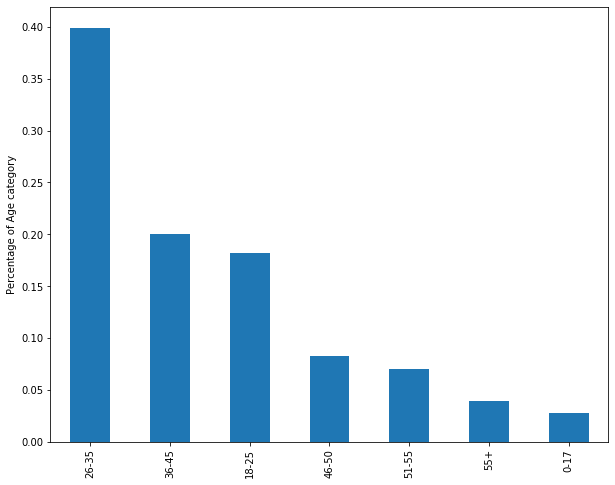

In [23]:
plt.figure(figsize=(10,8))
df['Age'].value_counts(normalize=True).plot.bar()
plt.ylabel('Percentage of Age category')
plt.show()

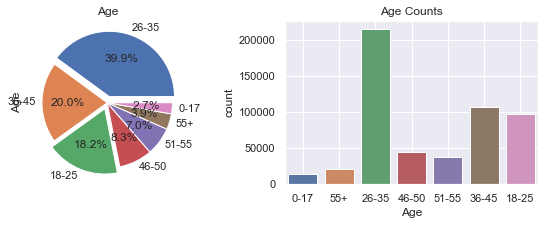

In [35]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
df['Age'].value_counts().plot.pie(explode=[0.1,0,0.1,0,0,0,0],autopct="%1.1f%%", ax=ax[0])
ax[0].set_title('Age')

sns.countplot(x='Age',data=df,ax=ax[1])
ax[1].set_title('Age Counts')
plt.grid(True)
plt.show()

In [37]:
df.pivot_table(values='Purchase',index="Age",aggfunc="mean")

,Purchase
Age,
0-17,9020.126878
18-25,9235.197575
26-35,9314.588970
36-45,9401.478758
46-50,9284.872277
51-55,9620.616620
55+,9453.898579


## Visualize mean purchase amount 

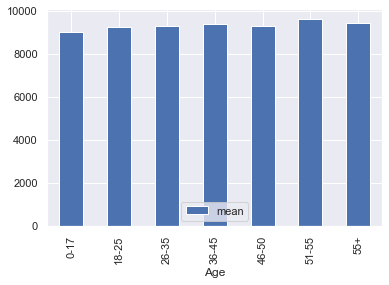

In [41]:
df.groupby('Age')['Purchase'].agg(['mean']).plot.bar()
plt.legend()

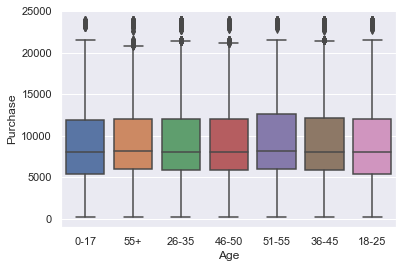

In [43]:
sns.boxplot(x='Age',y='Purchase',data=df)

## Normalization and Standardization

*We will not normalize or standardize the dependant variable* 

Will only preprocess the independant variables.

Just for representation we are using purchase here.

In [46]:
# minmax scaler scales down to 0 to 1
# StandardScaler, will transform to z-score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [71]:
mm = MinMaxScaler()
ss = StandardScaler()

In [72]:
df['Purchase_nm'] = mm.fit_transform(df['Purchase'].values.reshape(-1,1))
df['Purchase_ss'] = ss.fit_transform(df['Purchase'].values.reshape(-1,1))

In [73]:
df[['Purchase','Purchase_nm','Purchase_ss']].head()

,Purchase,Purchase_nm,Purchase_ss
0,8370,0.344255,-0.193507
1,15200,0.631519,1.177699
2,1422,0.052027,-1.588402
3,1057,0.036676,-1.661681
4,7969,0.327389,-0.274012


In [85]:
x = [[1,2],[3,3]]
x[0]

[1, 2]

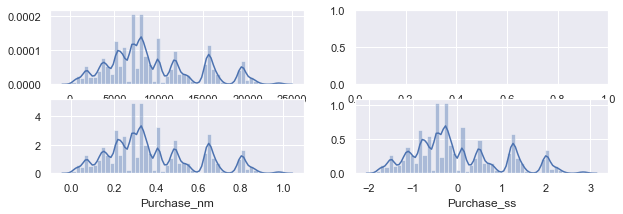

In [104]:
fig, ax = plt.subplots(2,2,figsize=(10,3))
sns.distplot(df['Purchase'],ax=ax[0,0])
sns.distplot(df['Purchase_nm'],ax=ax[1,0])
sns.distplot(df['Purchase_ss'],ax=ax[1,1])
# df[["Purchase_nm"]]
plt.show()

In [79]:
df[['Purchase','Purchase_nm','Purchase_ss']].describe()

,Purchase,Purchase_nm,Purchase_ss
count,537577.000000,537577.000000,5.375770e+05
mean,9333.859853,0.384794,-1.618880e-16
std,4981.022133,0.209498,1.000001e+00
min,185.000000,0.000000,-1.836745e+00
25%,5866.000000,0.238938,-6.962152e-01
50%,8062.000000,0.331300,-2.553414e-01
75%,12073.000000,0.500000,5.499158e-01
max,23961.000000,1.000000,2.936577e+00


## Encoding categorical values

In [106]:
from sklearn.preprocessing import LabelEncoder

### Label encoding on Age

In [107]:
le = LabelEncoder()
df['Age_encoder'] = le.fit_transform(df['Age'])

In [111]:
le.classes_

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [117]:
df[['Age','Age_encoder']].values

array([['0-17', 0],
       ['0-17', 0],
       ['0-17', 0],
       ...,
       ['36-45', 3],
       ['36-45', 3],
       ['36-45', 3]], dtype=object)

### Dummy variables for Age

In [129]:
age = df[['Age']]
pd.get_dummies(age,columns=['Age'],drop_first=True)

,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
537572,0,0,1,0,0,0
537573,0,0,1,0,0,0
537574,0,0,1,0,0,0
537575,0,0,1,0,0,0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 15 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
Purchase_nm                   537577 non-null float64
Purchase_ss                   537577 non-null float64
Age_encoder                   537577 non-null int32
dtypes: float64(4), int32(1), int64(5), object(5)
memory usage: 49.2+ MB


### Extracting string and numeric values separately

#### Indexes -> numpy -> list

In [160]:
cat_list = df.select_dtypes(include=['object']).columns.values.tolist()
cat_list

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [161]:
num_list = df.select_dtypes(exclude=['object']).columns.values.tolist()
num_list

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

### Data transformation

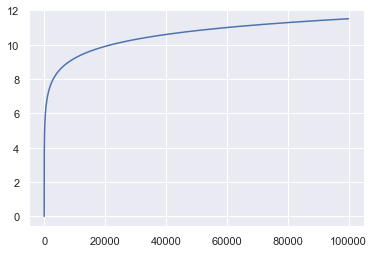

In [143]:
x = list(range(1,100000))
y = np.log(x)

sns.lineplot(x,y)

In [139]:
df['lpurchase'] = np.log(df['Purchase'])

In [140]:
df[['lpurchase','Purchase']].head()

,lpurchase,Purchase
0,9.032409,8370
1,9.629051,15200
2,7.259820,1422
3,6.963190,1057
4,8.983314,7969


Check the skewness whether the log tranformation has helped

In [144]:
df['lpurchase'].skew()

-1.0732085757666656

In [145]:
df['Purchase'].skew()

0.6242797316083074

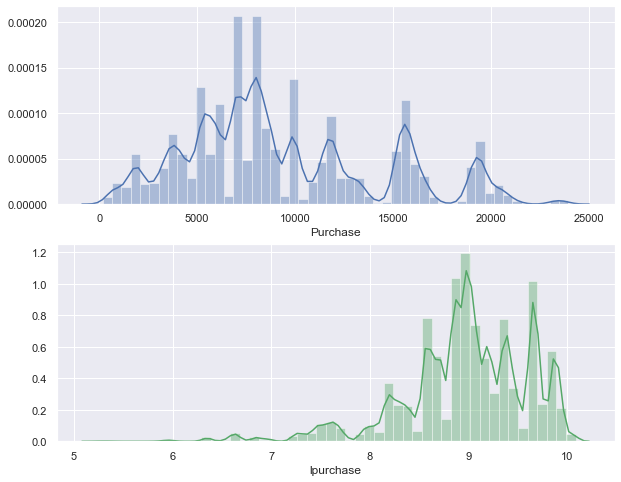

In [154]:
fig,ax = plt.subplots(2,1,figsize=(10,8))

sns.distplot(df['lpurchase'],color='g',ax=ax[1])
sns.distplot(df['Purchase'],color='b',ax=ax[0])
plt.show()

The transformation has made things worse, initially we had normal right skewness which got trandformed to left now.

c:\users\p s v\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\p s v\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


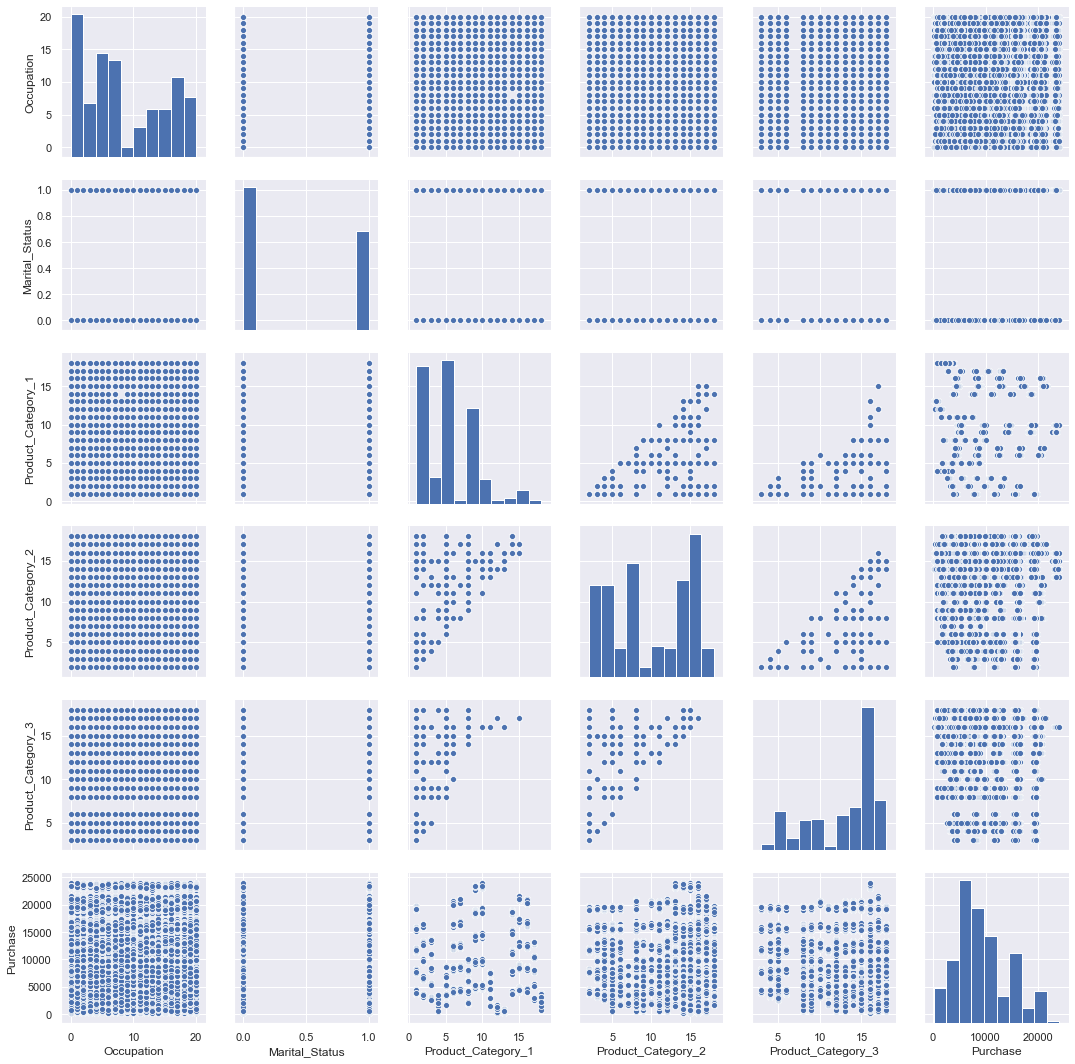

In [163]:
df_num = df[num_list]
sns.pairplot(df_num)

In [184]:
df[['Purchase']].describe()

,Purchase
count,537577.000000
mean,9333.859853
std,4981.022133
min,185.000000
25%,5866.000000
50%,8062.000000
75%,12073.000000
max,23961.000000


In [170]:
df[['Purchase']].describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [185]:
d =df[['Purchase']].describe()
q3 = d.loc['75%'].values
q3

array([12073.])

In [196]:
df['Purchase_high'] = df['Purchase'].apply(lambda x: 1 if x > q3 else 0)
df.pivot_table(values="Purchase",index=['Purchase_high'],aggfunc=['min','max'])

,min,max
,Purchase,Purchase
Purchase_high,,
0,185,12073
1,12074,23961


In [201]:
num_list[0,1,5]

TypeError: list indices must be integers or slices, not tuple

In [202]:
df.iloc

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_high
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,1
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,0
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664,0
537573,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196,1
537574,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043,0
537575,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172,0


In [ ]:
sns.pairplot(df[num_list[0]])

### Train test split

#### On dummy data

In [207]:
x = pd.DataFrame(np.array(range(10,110,10)),columns=['X'])
y = pd.DataFrame(np.array(range(1,11)),columns=['y'])

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train,X_test, y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [211]:
print(X_train)

     X
0   10
7   80
2   30
9  100
4   50
3   40
6   70


#### On csv file

In [216]:
X = df.drop('Purchase',axis=1)
y = df[['Purchase']]

In [219]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=42
                                                )

In [224]:
print(X_train.shape)
print(X_test.shape)

(376303, 10)
(161274, 10)


In [230]:
ss = StandardScaler()
num_cols = X_train.select_dtypes(exclude='object').columns.values.tolist()
Xtrn2 = ss.fit_transform(X_train[num_cols])
# Just to avoid copy warning
X_train = X_train.copy()
X_train.loc[:,num_cols] = Xtrn2

In [231]:
Xtst2 = ss.transform(X_test[num_cols])

X_test = X_test.copy()
X_test.loc[:, num_cols] = X_test